In [28]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Завантаження
df = pd.read_csv("data/Wholesale customers data.csv")
data = df.select_dtypes(include="number")

In [4]:
print(df.head())
print(df.info())

   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     7561     214              2674        1338
1        2       3   7057  9810     9568    1762              3293        1776
2        2       3   6353  8808     7684    2405              3516        7844
3        1       3  13265  1196     4221    6404               507        1788
4        2       3  22615  5410     7198    3915              1777        5185
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen  

In [5]:
from sklearn.preprocessing import StandardScaler

X_raw = df.drop(columns=["Channel", "Region"])

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_raw)

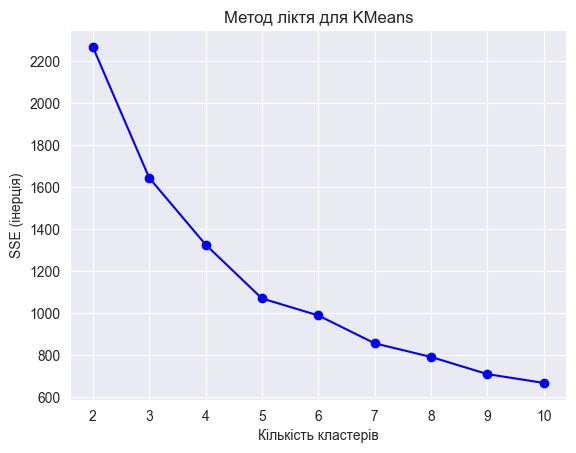

In [6]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

sse = []
K = range(2, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    sse.append(kmeans.inertia_)

plt.plot(K, sse, 'bo-')
plt.xlabel("Кількість кластерів")
plt.ylabel("SSE (інерція)")
plt.title("Метод ліктя для KMeans")
plt.show()

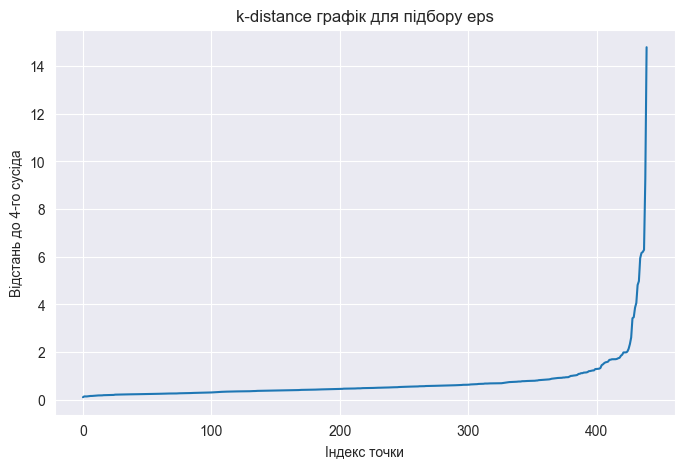

In [13]:
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import numpy as np


k = 4

neigh = NearestNeighbors(n_neighbors=k)
nbrs = neigh.fit(X_scaled)
distances, indices = nbrs.kneighbors(X_scaled)

k_distances = np.sort(distances[:, k-1])

plt.figure(figsize=(8, 5))
plt.plot(k_distances)
plt.title("k-distance графік для підбору eps")
plt.xlabel("Індекс точки")
plt.ylabel(f"Відстань до {k}-го сусіда")
plt.grid(True)
plt.show()

In [12]:
kmeans = KMeans(n_clusters=4, random_state=42)
labels_kmeans = kmeans.fit_predict(X_scaled)

df['Cluster_KMeans'] = labels_kmeans

In [14]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=2, min_samples=5)
labels_dbscan = db.fit_predict(X_scaled)

df['Cluster_DBSCAN'] = labels_dbscan

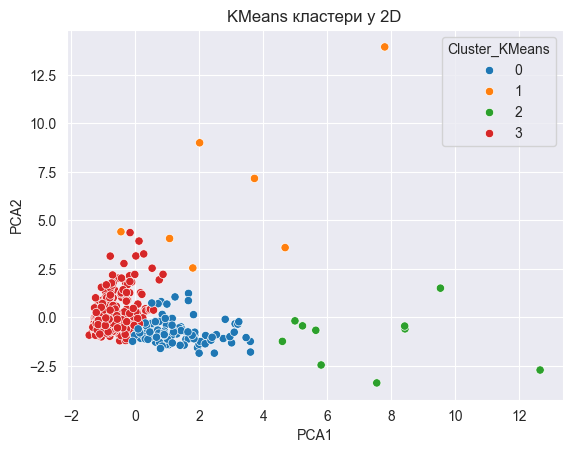

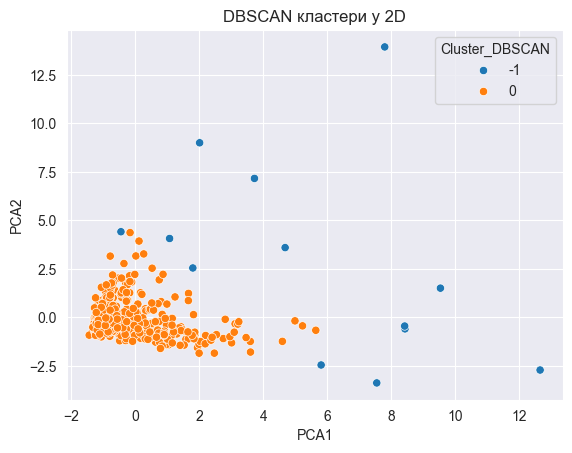

In [15]:
from sklearn.decomposition import PCA
import seaborn as sns

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

df['PCA1'] = X_pca[:,0]
df['PCA2'] = X_pca[:,1]

sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='Cluster_KMeans', palette='tab10')
plt.title("KMeans кластери у 2D")
plt.show()

sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='Cluster_DBSCAN', palette='tab10')
plt.title("DBSCAN кластери у 2D")
plt.show()

In [16]:
from sklearn.metrics import silhouette_score

print("Silhouette KMeans:", silhouette_score(X_scaled, labels_kmeans))
print("Silhouette DBSCAN:", silhouette_score(X_scaled, labels_dbscan))

Silhouette KMeans: 0.34939129340421093
Silhouette DBSCAN: 0.7486988127438182


In [17]:
from sklearn.metrics import silhouette_score

scores = []
for k in range(2, 11):
    km = KMeans(n_clusters=k, random_state=42)
    labels = km.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    scores.append(score)

In [20]:
import pandas as pd
df = pd.DataFrame(X_scaled)
df['cluster'] = labels
print(df.groupby('cluster').mean())

                0         1         2         3         4          5
cluster                                                             
0       -0.533045  0.346827  0.531291 -0.357285  0.533296  -0.072204
1        1.076764  5.109117  5.638317 -0.089899  5.688837   0.420295
2        1.610919 -0.146619 -0.260811  0.233497 -0.416300   0.059292
3        0.180287 -0.098091 -0.273061  4.678857 -0.492199   0.279888
4        0.229519 -0.447641 -0.466831  0.168107 -0.446067  -0.129207
5        1.966817  5.175503  1.287217  6.900600 -0.554862  16.478447
6        0.206071  1.505212  0.558192  0.298021  0.054490   2.215188
7       -0.485931  1.369115  2.023738 -0.270549  2.299309   0.107909
8        4.665857  0.256724  0.036579  1.993317 -0.293616   0.678037
9       -0.561713 -0.428362 -0.503690 -0.322910 -0.439168  -0.259229


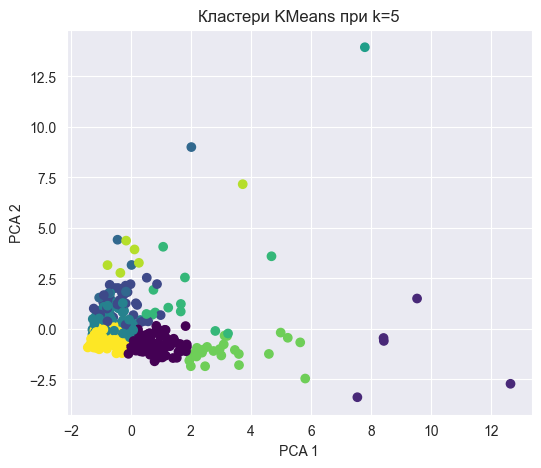

In [22]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
best_k = 5
plt.figure(figsize=(6,5))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis')
plt.title(f'Кластери KMeans при k={best_k}')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.grid(True)
plt.show()


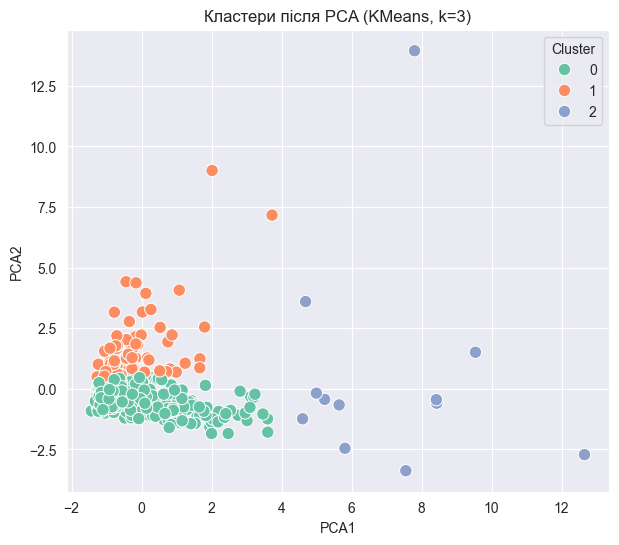

In [29]:
features = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']
df.columns = df.columns.str.strip()
X_selected = df[features]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_selected)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(X_pca)

pca_df = pd.DataFrame(X_pca, columns=['PCA1', 'PCA2'])
pca_df['Cluster'] = labels

plt.figure(figsize=(7, 6))
sns.scatterplot(data=pca_df, x='PCA1', y='PCA2', hue='Cluster', palette='Set2', s=80)
plt.title("Кластери після PCA (KMeans, k=3)")
plt.grid(True)
plt.show()

In [30]:
from sklearn.metrics import silhouette_score
silhouette = silhouette_score(X_pca, labels)
print(f"Silhouette Score: {silhouette:.4f}")


Silhouette Score: 0.3817


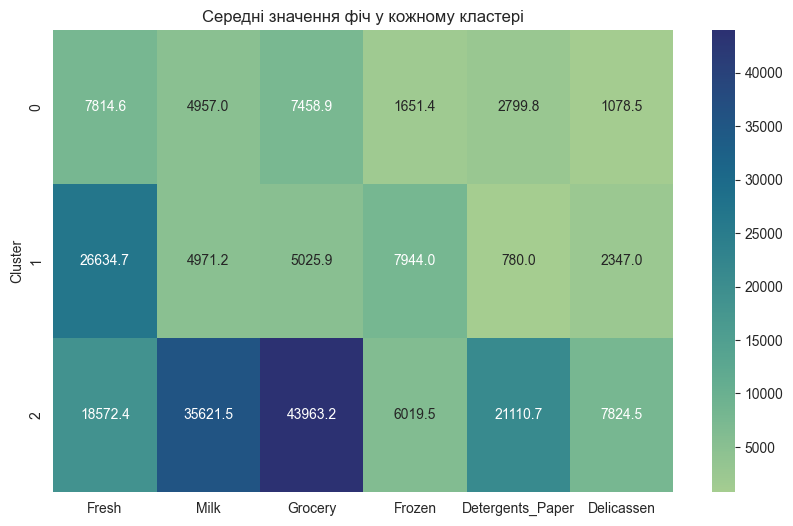

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

X_clustered = X_selected.copy()
X_clustered["Cluster"] = labels

cluster_means = X_clustered.groupby("Cluster").mean()

plt.figure(figsize=(10, 6))
sns.heatmap(cluster_means, annot=True, fmt=".1f", cmap="crest")
plt.title("Середні значення фіч у кожному кластері")
plt.show()

In [35]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

features = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']
X = df[features]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

kmeans = KMeans(n_clusters=3, random_state=42)
cluster_labels = kmeans.fit_predict(X_pca)

df['Cluster'] = cluster_labels

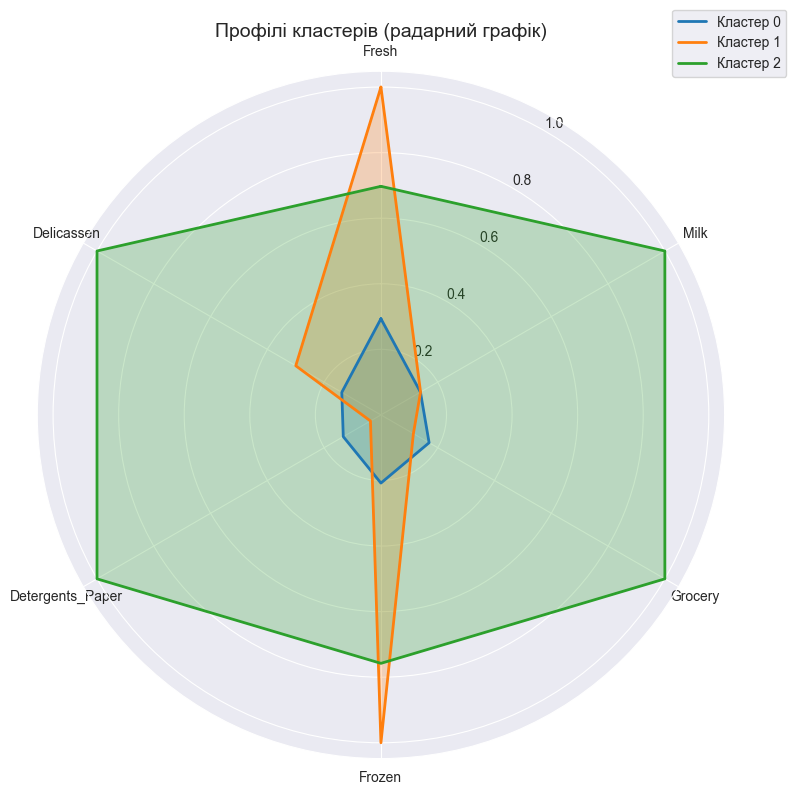

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

features = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']

cluster_means = df.groupby('Cluster')[features].mean()


normalized_means = cluster_means / cluster_means.max()

labels = features
num_vars = len(labels)

angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

colors = ['#1f77b4', '#ff7f0e', '#2ca02c']

for i, (index, row) in enumerate(normalized_means.iterrows()):
    values = row.tolist()
    values += values[:1]
    ax.plot(angles, values, color=colors[i], linewidth=2, label=f'Кластер {index}')
    ax.fill(angles, values, color=colors[i], alpha=0.25)

ax.set_title('Профілі кластерів (радарний графік)', fontsize=14)
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)
ax.set_thetagrids(np.degrees(angles[:-1]), labels)
ax.set_rlabel_position(180 / num_vars)
plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))
plt.tight_layout()
plt.show()

Що було зроблено:
Підготовка даних:

Було обрано лише кількісні змінні (Fresh, Milk, Grocery, Frozen, Detergents_Paper, Delicassen) для аналізу.

Зменшення розмірності:

Використано PCA для зменшення до 2 компонентів і зручної візуалізації.

Кластеризація (KMeans):

Використано метод KMeans з 3 кластерами.

Побудовано графік розподілу кластерів у просторі головних компонент.

Оцінка якості кластеризації:

Обчислено Silhouette Score для KMeans (0.3817) — помірний результат.

Інтерпретація кластерів:

Побудовано теплову карту середніх значень фіч по кластерах.

Додатково виведено радарний графік профілю кожного кластера.

Що вдалося:
Візуалізація кластерів у 2D (PCA) була чіткою й інформативною.

Silhouette Score свідчить, що кластери хоч і не ідеальні, але мають сенс.

Інтерпретація кластера на основі середніх значень фіч дозволяє описати сегменти користувачів.

Радарний графік дав змогу добре порівняти поведінку кластерів.

Що варто покращити / не вдалося повністю:
Використано лише один метод кластеризації (KMeans). Для кращого порівняння варто додати Agglomerative Clustering.

Не було аналізу стійкості кластерів при зміні k (можна було б зробити Elbow method).

Не проведено додаткової оцінки бізнес-інтерпретації